In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from matplotlib.path import Path
import ast
import pickle
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import networkx as nx
from collections import Counter

# Analysis

In [2]:
l = {}
threshold = [1,2,3,4,5,10,15,20,50,100,200]


for t in threshold:
    count = 0 
#    fh=open('output/network_france_germany.csv','r')
    fh=open('network_france_germany.csv','r')

    for line in fh.readlines():
        s=line.strip().split(',')
        if int(s[2]) > t:
            count = count + 1
    l[t] = count
l

{1: 610546,
 2: 348796,
 3: 239995,
 4: 181104,
 5: 143941,
 10: 65270,
 15: 38554,
 20: 25511,
 50: 4391,
 100: 508,
 200: 6}

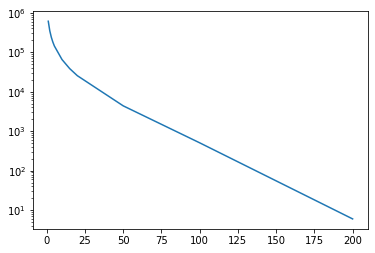

In [3]:
plt.semilogy(l.keys(),l.values())

In [5]:
def load_graph(MIN_TILES):
    G=nx.Graph()
#    fh=open('output/network_france_germany.csv','r')
    fh=open('network_france_germany.csv','r')


    for line in fh.readlines():
        s=line.strip().split(',')
        if int(s[2]) >= MIN_TILES :
            G.add_edge(str(s[0]),int(s[1]),weight = int(s[2]))
    fh.close()  
    return G

In [16]:
def max_min_tiles(guess):
    # trova il massimo numero minimo di tiles messe da un utente per cui abbiamo una componente sola!
    G = load_graph(guess)
    n_comps = len([c for c in nx.connected_components(G)])
    MIN_TILES = guess
    while n_comps > 1 :
        G  = load_graph(MIN_TILES)
        n_comps = len([c for c in nx.connected_components(G)])        
        MIN_TILES = MIN_TILES -  1

    return G, MIN_TILES

In [18]:
G,MIN_TILES = max_min_tiles(25)
MIN_TILES

22

In [24]:
MIN_TILES = 2

In [29]:
import random
G=nx.Graph()
#fh=open('output/network_france_germany.csv','r')
fh=open('network_france_germany.csv','r')


for line in fh.readlines():
    s=line.strip().split(',')
    if int(s[2]) > MIN_TILES:
        if random.random() < 0.1:
            G.add_edge(str(s[0]), int(s[1]), weight = int(s[2]))
fh.close()  

In [30]:
len(G.nodes)

34613

In [31]:
counter = 0
for node in G.nodes:
    if isinstance(node, str):
        counter += 1
counter
print('abbiamo ',counter,' artworks e ', len(G.nodes) - counter, ' utenti' )

abbiamo  9  artworks e  34604  utenti


In [33]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[34613]

In [34]:
if len([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]) > 1:
    S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    G = nx.Graph(S[0])

### projected graph for arts

In [35]:
arts = nx.bipartite.sets(G)[0]
users = nx.bipartite.sets(G)[1]
len(arts), len(users)

(9, 34604)

ImportError: cairo backend requires that pycairo>=1.11.0 or cairocffi is installed

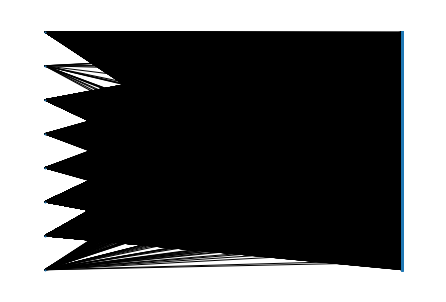

In [13]:
pos = nx.bipartite_layout(G, arts)
nx.draw(G,pos,node_size=1)
plt.savefig('plot/bipartite_net.png',dpi = 300,backend = 'cairo')

In [36]:
A = bipartite.projected_graph(G,arts, multigraph=False)

In [ ]:
U = bipartite.projected_graph(G,users, multigraph=False)

In [16]:
len(A.edges), len(U.edges)

(10, 51848618)

In [19]:
#pos = nx.circular_layout(A)
pos = nx.kamada_kawai_layout(A)
#pos = nx.spring_layout(A)

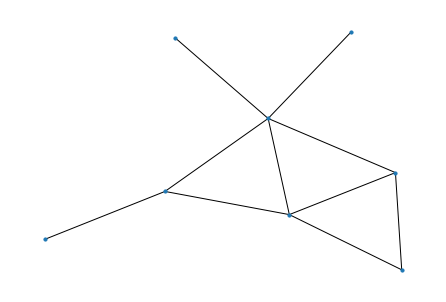

In [22]:
nx.draw(A,pos,node_size=10)
#plt.savefig('plot/project_net_arts.png',dpi = 300,backend = 'cairo')
plt.savefig('plot/project_net_arts.png',dpi = 300)

In [19]:
pos = nx.circular_layout(U)
#pos = nx.kamada_kawai_layout(U)
#pos = nx.spring_layout(U)

In [20]:
nx.draw(U,pos,node_size=10)
plt.savefig('plot/project_net_arts.png',dpi = 300,backend = 'cairo')


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fc08fd40310> (for post_execute):



KeyboardInterrupt



# analisi del network

### density

In [23]:
def density(G):
    return 2* G.number_of_edges()/(G.number_of_nodes() * (G.number_of_nodes() - 1))
density(A), density(U)

(0.35714285714285715, 0.3410348330292035)

### distribuzione di grado

Counter({9083: 9059, 3678: 3663, 2311: 2287, 1359: 1347, 571: 571, 359: 357, 93: 92, 19: 19, 11380: 15, 5980: 10, 10437: 6, 5035: 3, 12759: 3, 1451: 2, 378: 1, 1718: 1, 9442: 1, 1930: 1})


(1.0, 10000.0, 1e-05, 1.0)

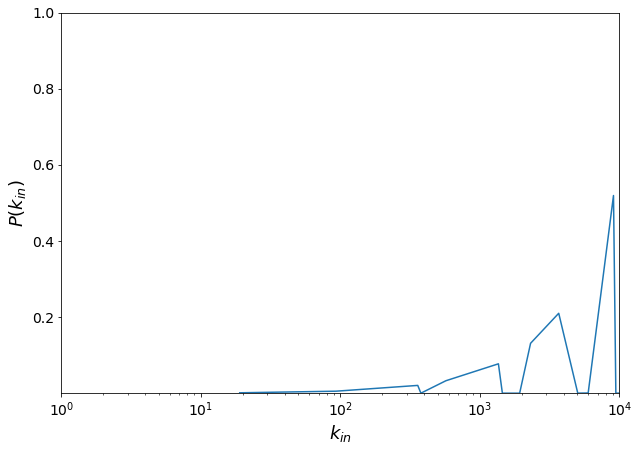

In [26]:
from collections import Counter 
import matplotlib.pyplot as plt

indeg=dict(U.degree()).values()
degin_distri=Counter(indeg)
print(degin_distri)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(U))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('linear')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [ ]:
### clustering

In [ ]:
### 